# Prepare the environment

In [1]:
import numpy as np
import pandas as pd

from Label_Bot.label_bot import utils, models

# Load the dataset 

In [2]:
mode='test'

In [3]:
df = pd.read_pickle(f'{mode}_20k.pkl')
df = utils.make_st_compatible(df)

y_true = np.array(list(map(list, df.labels)))

# Evaluate the pretrained model

In [4]:
bot = models.Bot(use_head=False, model_path='trained_models/roberta-base')

In [5]:
model_outputs = bot.predict(df['title'], df['body'])

HBox(children=(FloatProgress(value=0.0, max=19688.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=2461.0), HTML(value='')))

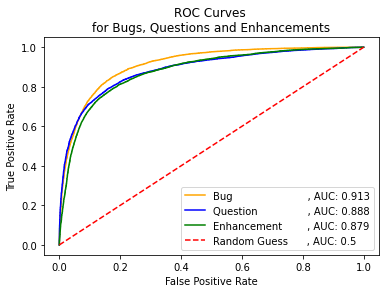

,Accuracy,ROC-AUC,Precision,Recall,F1
Bug,0.840766,0.913062,0.787458,0.792853,0.790147
Question,0.823293,0.888261,0.872152,0.561593,0.683238
Enhancement,0.790786,0.879381,0.859766,0.516405,0.645250


In [6]:
metrics_df, exact_accuracy, lrap_score = utils.get_model_stats(y_true, model_outputs)
metrics_df

In [7]:
stats_df = pd.DataFrame([exact_accuracy, lrap_score]).T
stats_df.columns = ['Exact Match Accuracy', 'LRAP']
stats_df.index = ['value']
stats_df

,Exact Match Accuracy,LRAP
value,0.608543,0.884469


# Evaluate the pretrained classifier with scores' head

In [8]:
bot = models.Bot(use_head=True, model_path='trained_models/roberta-base')

In [9]:
model_outputs = bot.predict(df['title'], df['body'])

HBox(children=(FloatProgress(value=0.0, max=19688.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=2461.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=19688.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=2461.0), HTML(value='')))

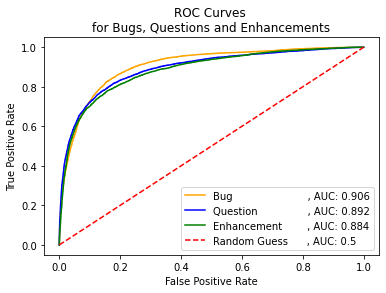

,Accuracy,ROC-AUC,Precision,Recall,F1
Bug,0.837515,0.906309,0.797227,0.764777,0.780665
Question,0.840004,0.891995,0.807311,0.694207,0.746499
Enhancement,0.825833,0.883895,0.790963,0.716708,0.752007


In [10]:
metrics_df, exact_accuracy, lrap_score = utils.get_model_stats(y_true, model_outputs)
metrics_df

In [11]:
stats_df = pd.DataFrame([exact_accuracy, lrap_score]).T
stats_df.columns = ['Exact Match Accuracy', 'LRAP']
stats_df.index = ['value']
stats_df

,Exact Match Accuracy,LRAP
value,0.684783,0.886064
